In [3]:
import skimage.io as io
%matplotlib inline

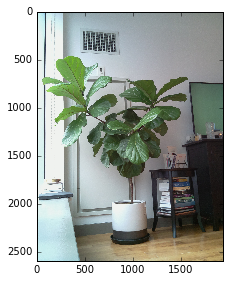

In [19]:
plant = io.imread('06-05-16_12:30.jpg')
io.imshow(plant)
io.show()

In [82]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images,titles=None,f=plt.imshow,figsize=(10,10)):
    """ Display images side by side with their respective titles
        args: 
            images: list of image names
            titles (optional): list of image titles, defaults to 1..len(images)
            f (optional): type of plot, defaults to imshow
        returns:
            Nothing
    """
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n) # Make subplot
        if image.ndim == 2: # Is image grayscale?
            plt.gray()
        f(image)
        a.set_title(title)
        n += 1

    fig.set_size_inches(np.array(fig.get_size_inches()) * (n_ims,1))
    plt.show()
    

Side by side, 30 min apart


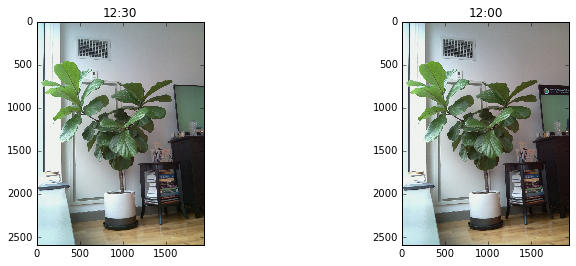

In [91]:
print 'Side by side, 30 min apart'
image_names = ['06-05-16_12:30.jpg','06-05-16_12:00.jpg']
images = [io.imread(image) for image in image_names]
show_images(images, ["12:30", "12:00"])

Trying to fiter out the separate colors
plant shape: (2592, 1944, 3)


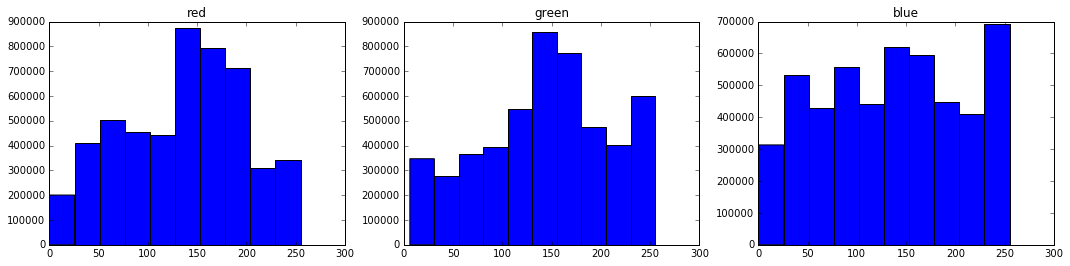

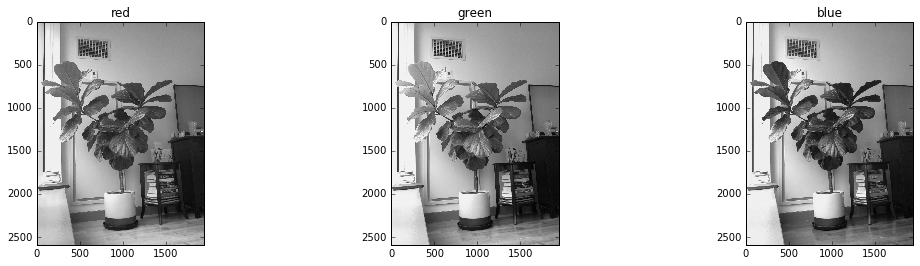

In [108]:
print 'Trying to fiter out the separate colors'
print "plant shape: %s" % str(plant.shape) # (2592, 1944, 3)
red, green, blue = plant[:,:,0], plant[:,:,1], plant[:,:,2]
images = [red, green, blue]
images_hist = [image.flatten() for image in images]
titles = ['red','green','blue']
show_images(images_hist,titles=titles,f=plt.hist)
show_images(images,titles=titles)

Where is all this [red|green|blue] coming from? (Everywhere)


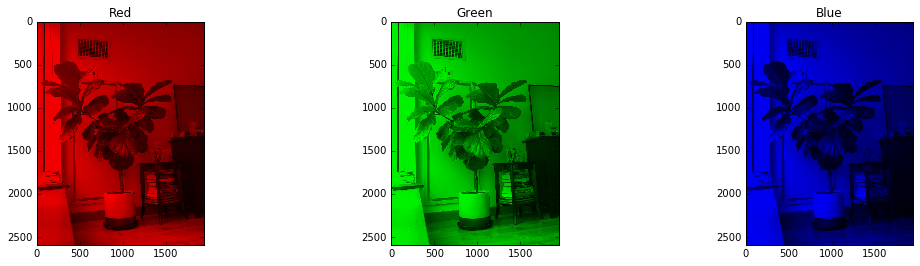

In [110]:
print 'Where is all this [red|green|blue] coming from? (Everywhere)'
red_color, green_color, blue_color = plant.copy(), plant.copy(), plant.copy()
red_color[:,:,(1,2)] = 0
green_color[:,:,(0,2)] = 0
blue_color[:,:,(0,1)] = 0

show_images(images=[red_color, green_color, blue_color],titles=['Red', 'Green','Blue'])

Adding colors could be fun


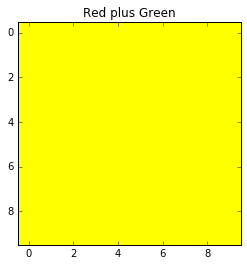

In [111]:
print "Adding colors could be fun"
rgb_image = np.zeros(shape=(10,10,3),dtype=np.uint8)

rgb_image[:,:,0] = 255 # red
rgb_image[:,:,1] = 255 # green
rgb_image[:,:,2] = 0 # blue

show_images(images=[rgb_image],titles=["Red plus Green"])

Let's only look at the REALLY green stuff


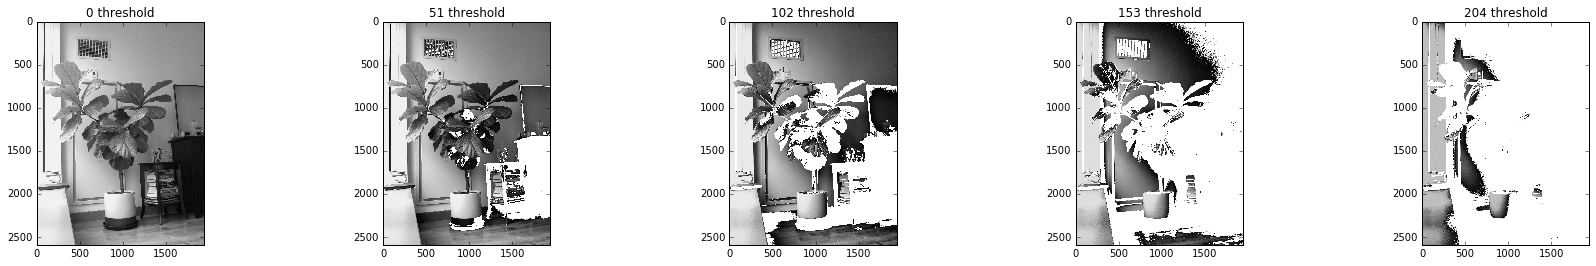

In [123]:
print "Let's only look at the REALLY green stuff"
thresholds = range(0,255,255//5)
greens = []
for threshold in thresholds:
    temp_green = green.copy()
    temp_green[temp_green < threshold] = 255
    greens.append(temp_green)
show_images(greens,["%d threshold" % threshold for threshold in thresholds])

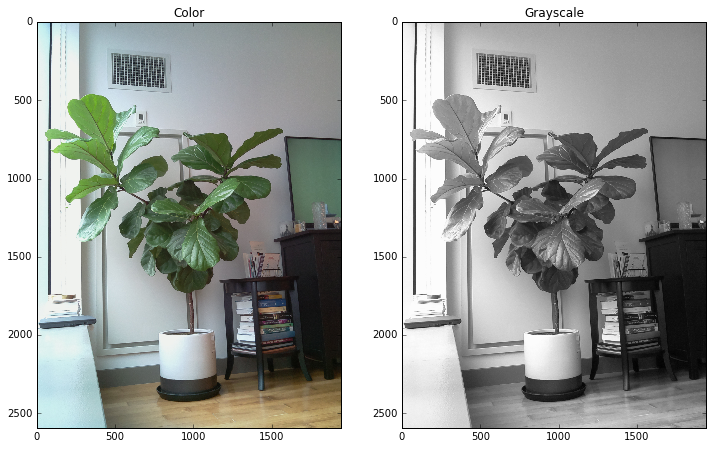

Color image shape (2592, 1944, 3)
Grayscale image shape (2592, 1944)


In [9]:
from skimage.color import rgb2gray

gray_plant = rgb2gray(plant)
show_images(images=[plant,gray_plant],titles=['Color','Grayscale'])

print "Color image shape %s" % str(plant.shape)
print "Grayscale image shape %s" % str(gray_plant.shape)
# Grayscale removes a dimension from the image and uses floating points to 
# represent the gray intesnity


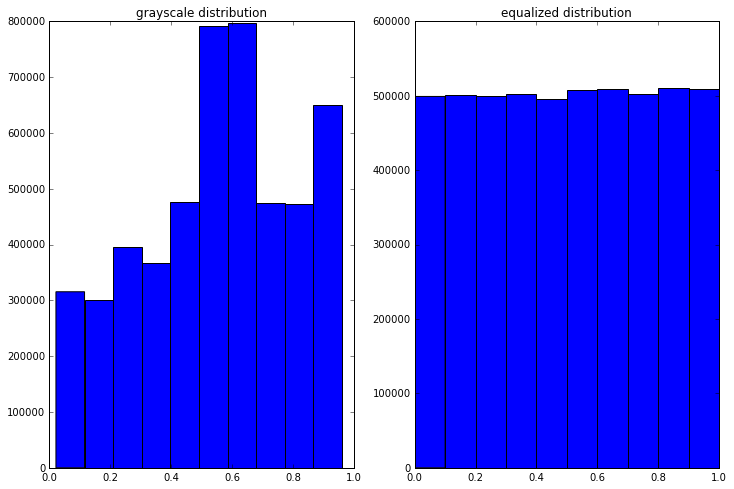

In [48]:
# fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10),sharey=True)
# ax0, ax1 = axes.flat

# Let's see what the gray distribution is like in our grayscale plant
# ax0.hist(gray_plant.flatten())
# ax0.set_title('grayscale gray distribution')
# from skimage.exposure import equalize_hist

# Equalized gray distribution
equalized_plant = equalize_hist(gray_plant)
hists = [gray_plant.flatten(), equalized_plant.flatten()]
titles = ['grayscale distribution', 'equalized distribution']

# ax1.hist(equalized_plant.flatten())
# ax1.set_title('equalized grayscale gray distribution',)
show_images(hists, titles=titles, f=plt.hist)

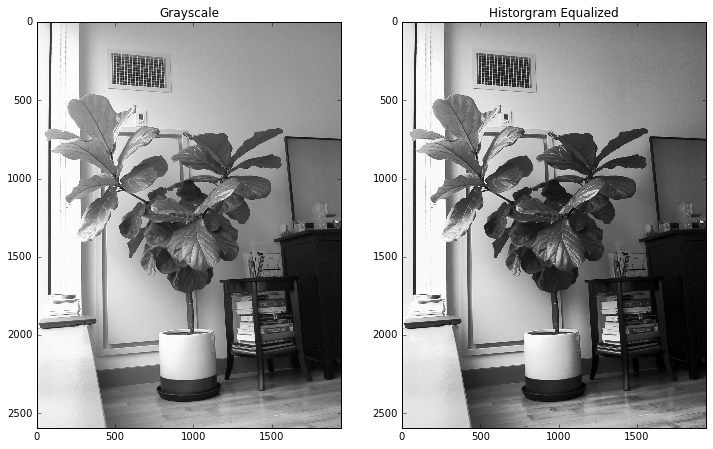

In [17]:
from skimage.exposure import equalize_hist

equalized_plant = equalize_hist(gray_plant)

show_images(images=[gray_plant, equalized_plant], 
            titles=['Grayscale', 'Historgram Equalized'])

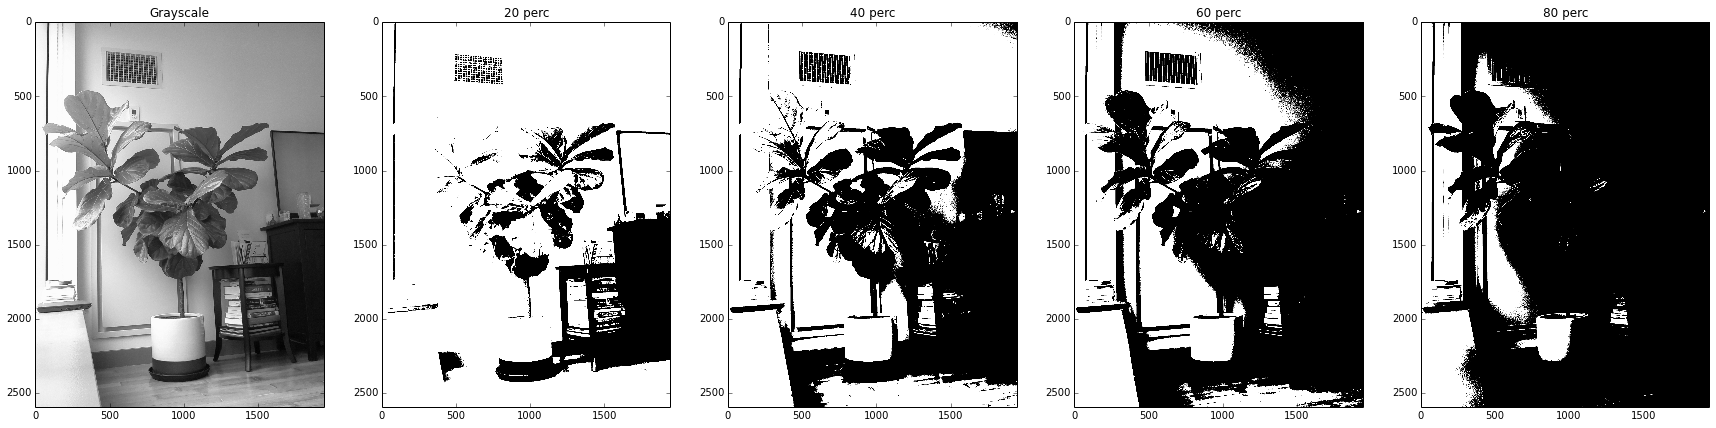

In [10]:
images = [gray_plant]
image_names = ["Grayscale"]
for perc in range(20,100,20):
    image = np.where(gray_plant > np.percentile(gray_plant,perc), 1., 0.)
    images.append(image)
    image_names.append("%d perc" % perc)
show_images(images=images, titles=image_names)

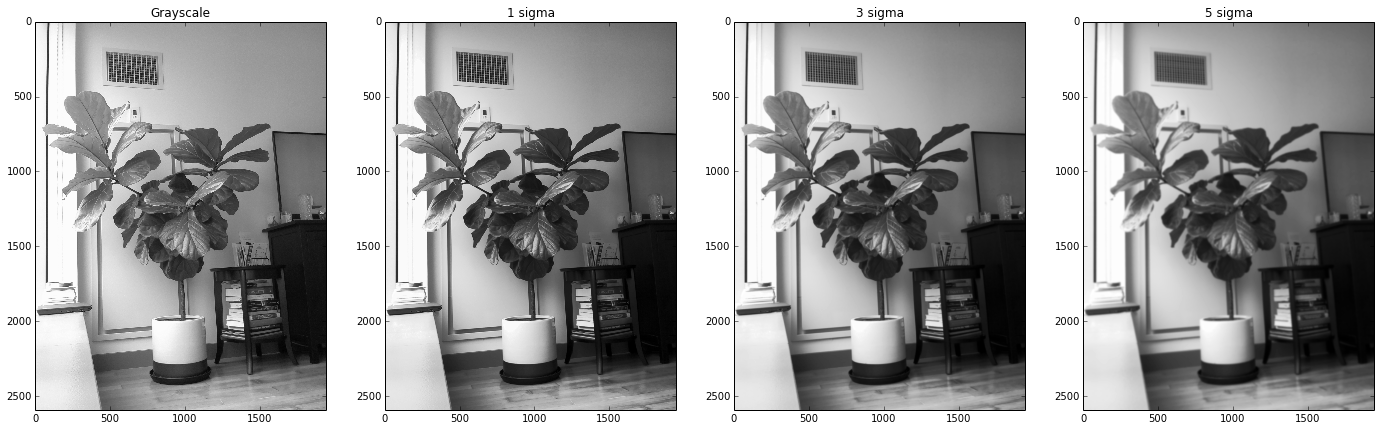

In [11]:
from skimage.filters import gaussian
images = [gray_plant]
image_names=["Grayscale"]
for sigma in range(1,7,2):
    image = gaussian(equalized_plant, sigma=sigma)
    images.append(image)
    image_names.append("%d sigma" % sigma)
show_images(images=images,titles=image_names)

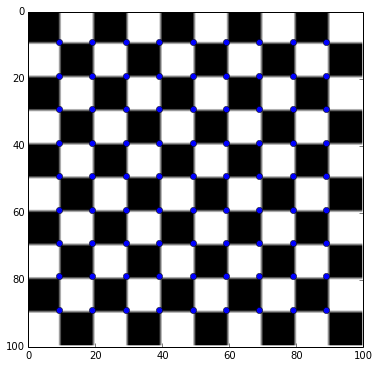

Number of corners: 81


In [12]:
from skimage.feature import corner_harris, corner_peaks

def show_corners(corners,image,title=None):
    """Display a list of corners overlapping an image"""
    fig = plt.figure()
    plt.imshow(image)
    # Convert coordinates to x and y lists
    y_corner,x_corner = zip(*corners)
    plt.plot(x_corner,y_corner,'o')
    if title:
        plt.title(title)
    plt.xlim(0,image.shape[1])
    plt.ylim(image.shape[0],0)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()
    print "Number of corners: %d" % len(corners)

checkers = np.zeros((100,100),dtype=np.bool)
ind = np.arange(100).reshape((10,10))[::2].flatten()
checkers[ind,:] = True
checkers[:,ind] = np.invert(checkers[:,ind])
checkers = np.where(checkers,1.,0.)

checkers_corners = corner_peaks(corner_harris(checkers), 
                                min_distance=2)
show_corners(checkers_corners,checkers)

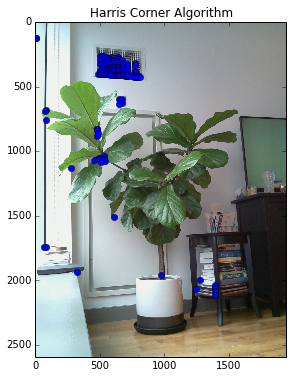

Number of corners: 131


In [13]:
corners = corner_peaks(corner_harris(gray_plant),min_distance=2)
show_corners(corners,plant,title='Harris Corner Algorithm')

In [153]:
import numpy as np
import cv2
from PIL import Image, ImageFilter

def process(image_names):
    """image_names: ['06-05-16_06:00.jpg',...]"""
    images = []
    for name in image_names:
        plant2 = cv2.imread(name)
        plant2 = plant2[425:1800,:1600,:]

        # hsv = cv2.cvtColor(plant2, cv2.COLOR_BGR2HSV)

        # lower_green = np.array([30,45,0])
        # upper_green = np.array([255,255,255])

        # mask = cv2.inRange(hsv,lower_green,upper_green)
        res = rgb2gray(plant2)
        res = equalize_hist(res)
        
        pil_image = Image.fromarray(np.uint8(res*255))
        pil_image = pil_image.filter(ImageFilter.FIND_EDGES)

        corners = corner_peaks(corner_harris(pil_image),min_distance=50)
        show_corners(corners,plant2,title='Harris Corner Algorithm')
        

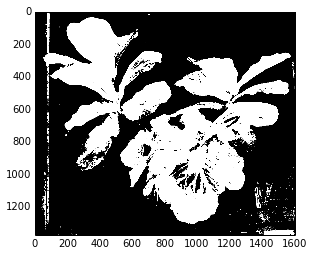

In [191]:
hsv = cv2.cvtColor(plant2, cv2.COLOR_BGR2HSV)
lower_green = np.array([30,45,0])
upper_green = np.array([255,255,255])

mask = cv2.inRange(hsv,lower_green,upper_green)
imshow(mask)

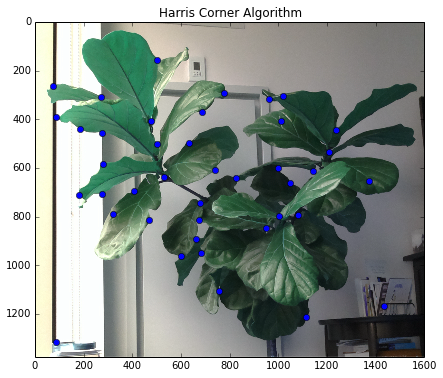

Number of corners: 41


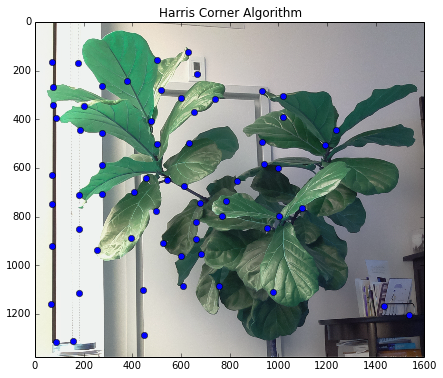

Number of corners: 65


In [155]:
process(['06-05-16_06:00.jpg','06-05-16_12:00.jpg'])
# print type(res)

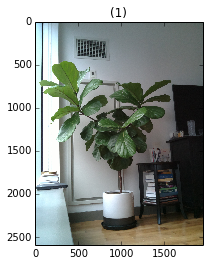

In [105]:
from PIL import Image, ImageFilter
from matplotlib.pyplot import imshow

pil_image = Image.open('06-05-16_06:00.jpg')
pil_image = np.asarray(pil_image)
pil_image = Image.fromarray(pil_image)
show_images([np.asarray(pil_image)])
# print type(Image.open('06-05-16_06:00.jpg'))
# print type(Image.fromarray(np.uint8(res*255)))
# pil_image = pil_image.filter(ImageFilter.FIND_EDGES)

# corners = corner_peaks(corner_harris(pil_image),min_distance=50)
show_corners(corners,plant2,title='Harris Corner Algorithm')

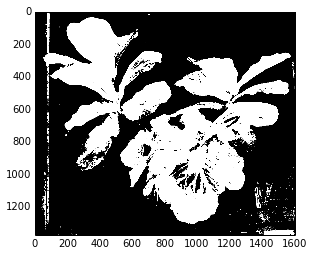

In [208]:
flower3 = np.array(res * 256, dtype='uint8')
imshow(mask)



In [185]:
(plant[:,:,1] > plant[:,:,2]) * (plant[:,:,1] > plant[:,:,0])

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)